In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import Functions as fn

In [2]:
file_path = "D:\\Fabian\\Documents\\GitHub\\Study-Data\\01. Debug and setup\\testing task 1\\debugging_001.csv"

In [3]:
data = np.genfromtxt(file_path,delimiter=',', names=True, dtype=None)

In [4]:
# tool sensor 1
Tx = fn.pullsamelengthdatawhere(data['State'], data['State_1'], data['Tx'])
Ty = fn.pullsamelengthdatawhere(data['State'], data['State_1'], data['Ty'])
Tz = fn.pullsamelengthdatawhere(data['State'], data['State_1'], data['Tz'])
Theta = fn.pullsamelengthdatawhere(data['State'], data['State_1'], data['Latitude'])
Phi = fn.pullsamelengthdatawhere(data['State'], data['State_1'], data['Longitude'])

In [5]:
# tool sensor 2
Tx_1 = fn.pullsamelengthdatawhere(data['State'], data['State_1'], data['Tx_1'])
Ty_1 = fn.pullsamelengthdatawhere(data['State'], data['State_1'], data['Ty_1'])
Tz_1 = fn.pullsamelengthdatawhere(data['State'], data['State_1'], data['Tz_1'])
Theta_1 = fn.pullsamelengthdatawhere(data['State'], data['State_1'], data['Latitude_1'])
Phi_1 = fn.pullsamelengthdatawhere(data['State'], data['State_1'], data['Longitude_1'])

In [6]:
Frames = fn.pullsamelengthdatawhere(data['State'], data['State_1'], data['Frame'])

In [7]:
# reference sensor
Tx_2 = fn.pulldatawhere(data['State_2'], data['Tx_2'])
Ty_2 = fn.pulldatawhere(data['State_2'], data['Ty_2'])
Tz_2 = fn.pulldatawhere(data['State_2'], data['Tz_2'])
Theta_2 = fn.pulldatawhere(data['State_2'], data['Latitude_2'])
Phi_2 = fn.pulldatawhere(data['State_2'], data['Longitude_2'])
Frames_2 = fn.pulldatawhere(data['State_2'],data['Frame_2'])

In [8]:
# get the vector components
u, v, w = fn.getvectorcomponents(Theta,Phi)
u_1, v_1, w_1 = fn.getvectorcomponents(Theta_1,Phi_1)
u_2, v_2, w_2 = fn.getvectorcomponents(Theta_2,Phi_2)

In [9]:
# for graphing purposes, grab the time signature of each point
Times = np.divide(np.subtract(Frames,Frames[0]), 40)

In [10]:
# work out the position between the sensors, on the tool axis
CenterLineX = np.divide(np.add(Tx, Tx_1), 2)
CenterLineY = np.divide(np.add(Ty, Ty_1), 2)
CenterLineZ = np.divide(np.add(Tz, Tz_1), 2)

In [11]:
DeltaT = 0
# create variable to hold the velocity array
Velocities = []

In [19]:
for i, n in np.ndenumerate(CenterLineX):

    # prevent off-by one index out of range exceptions
    if (i[0] + 1) < len(Frames):
        if Frames[i[0]] > 0:
            DeltaT = (Frames[i[0] + 1] - Frames[i[0]])/40

        else:
            DeltaT = 1/40
        DeltaXSquared = (CenterLineX[i[0] + 1] - CenterLineX[i[0]]) ** 2
        DeltaYSquared = (CenterLineY[i[0] + 1] - CenterLineY[i[0]]) ** 2
        DeltaZSquared = (CenterLineZ[i[0] + 1] - CenterLineZ[i[0]]) ** 2
        Sum = DeltaXSquared + DeltaYSquared + DeltaZSquared
        DeltaPosition = math.sqrt(Sum)
        Velocities.append(DeltaPosition / DeltaT)

In [14]:
AdotB = fn.getdotproduct(u, v, w, u_1, v_1, w_1)
print('maximum A.B = {:f}, minimum A.B = {:f}'.format(np.amax(AdotB),np.amin(AdotB)))

maximum A.B = 0.999994, minimum A.B = 0.989030


In [15]:
# now that we can be pretty sure our two sensors are fairly parallel;
# clone theta and phi from one onto the centerline vector
# and translate the point we're interested in along the vector
# first, get the "vector components"
Uc, Vc, Wc = fn.getvectorcomponents(Theta, Phi, 47)
# now add these to the centerline position:
TipX = np.add(CenterLineX, Uc)
TipY = np.add(CenterLineY, Vc)
TipZ = np.add(CenterLineZ, Wc)

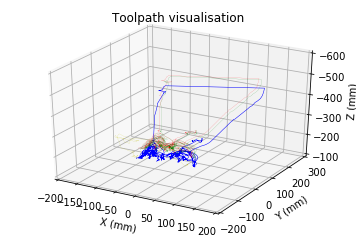

In [16]:
# create a plot
fig = plt.figure()
ax = fig.gca(projection='3d')

# set plot labels
ax.set_title('Toolpath visualisation')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')

ax.plot(TipX, TipY, TipZ, linewidth=0.5, label='Tool Axis', color='b')
ax.plot(Tx,Ty,Tz,linewidth = 0.1, label = 'Tool Sensor 1', color = 'r')
ax.plot(Tx_1,Ty_1,Tz_1,linewidth = 0.1, label = 'Tool Sensor 2', color = 'g')
ax.plot(Tx_2,Ty_2,Tz_2,linewidth=0.1, label='Reference Sensor', color='y')

plt.xlim((-200, 200))
plt.ylim((-200, 300))
ax.set_zlim(-600, -100)
ax.invert_zaxis()

plt.show()

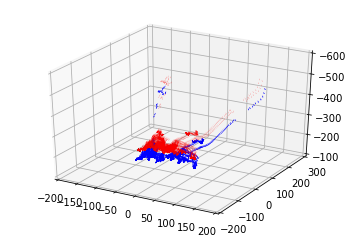

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.quiver(TipX, TipY, TipZ, u, v, w, length=8, normalize=True, color='b', linewidth=0.5)
ax.quiver(Tx, Ty, Tz, u, v, w, length=8, normalize=True, color='r', linewidth=0.1)
ax.quiver(Tx_1, Ty_1, Tz_1, u_1, v_1, w_1, length=8, normalize=True, color='r', linewidth=0.1)
plt.xlim((-200, 200))
plt.ylim((-200, 300))
ax.set_zlim(-600, -100)
ax.invert_zaxis()
plt.show()

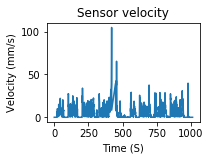

In [20]:
fig = mpl.pyplot.figure(1)
fig.suptitle = "Raw Sensor Movement Data"

plt.subplot(221)
plt.title("Sensor velocity")
plt.xlabel('Time (S)')
plt.ylabel('Velocity (mm/s)')
plt.plot(Times[0:-1],Velocities)
plt.show()